In [20]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
# Download MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

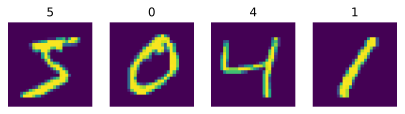

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(7, 3))
for img, label, ax in zip(x_train[:4], y_train[:4], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [10]:
print(f'train images: {x_train.shape}')
print(f'train labels: {y_train.shape}')
print(f' test images: {x_test.shape}')
print(f' test labels: {y_test.shape}')

train images: (60000, 28, 28)
train labels: (60000,)
 test images: (10000, 28, 28)
 test labels: (10000,)


In [11]:
# preprocessing
x_train = x_train.reshape(60000, 28 * 28) / 255
x_test = x_test.reshape(10000, 28 * 28) / 255

In [12]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
with tf.Session() as sesh:
    y_train = sesh.run(tf.one_hot(y_train, 10))
    y_test = sesh.run(tf.one_hot(y_test, 10))

# a one-hot array looks like
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
# hyper parameters
learning_rate = 0.01
epochs = 10
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

In [21]:
# inputs
# X is our "flattened / normalized" images
# Y is our "one hot" labels
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights and bias
# weights convert X to same shape as Y
# bias is the same shape as Y
W = tf.Variable(0.1 * np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(0.1 * np.random.randn(10).astype(np.float32))
# W = tf.Variable(np.zeros((784, 10)).astype(np.float32))
# B = tf.Variable(np.zeros(10).astype(np.float32))

In [22]:
pred = tf.nn.softmax(tf.add(tf.matmul(X,W), B))
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            sess.run(optimizer, feed_dict={X:x, Y:y})
            c = sess.run(cost, feed_dict={X:x, Y:y})

        if not epoch %1:
            print(f'epoch:{epoch:2d} cost={c:.4f}')

    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({X: x_test, Y: y_test})
    print(f'Accuracy: {acc * 100:.2f}%')
'''   
    fig, axes = plt.subplots(1, 10, figsize=(8, 4))
    for img, ax in zip(x_train[:10], axes):
        guess = np.argmax(sesh.run(pred, feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28, 28)))
        ax.axis('off')
'''

epoch: 0 cost=0.3150
epoch: 1 cost=0.7659
epoch: 2 cost=0.5240
epoch: 3 cost=0.4353
epoch: 4 cost=0.4281
epoch: 5 cost=0.5241
epoch: 6 cost=0.4174
epoch: 7 cost=0.3539
epoch: 8 cost=0.4865
epoch: 9 cost=0.2689
Accuracy: 88.94%


"   \n    fig, axes = plt.subplots(1, 10, figsize=(8, 4))\n    for img, ax in zip(x_train[:10], axes):\n        guess = np.argmax(sesh.run(pred, feed_dict={X: [img]}))\n        ax.set_title(guess)\n        ax.imshow(img.reshape((28, 28)))\n        ax.axis('off')\n"